<a href="https://colab.research.google.com/github/AnushkaBhatnagar/PCA-Model/blob/main/PCA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,Folate_mcg,Riboflavin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Zinc_mg,VitB6_USRDA,Calcium_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,684,0.003,0.17,2.32,3,0.034,24,0.000,0.02,2,0.09,0.001765,0.020000,0.004762,0.034286,0.018182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,684,0.003,0.13,2.32,3,0.034,24,0.016,0.16,2,0.05,0.001765,0.020000,0.004762,0.032857,0.018182
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876,0.28,99.48,0.00,0.00,840,0.001,0.01,2.80,0,0.005,4,0.001,0.00,0,0.01,0.000588,0.003333,0.000000,0.004286,0.000000
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353,21.40,28.74,2.34,0.50,198,0.166,1.22,0.25,36,0.382,528,0.040,0.31,23,2.66,0.097647,0.440000,0.054762,0.552857,0.263636
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371,23.24,29.68,2.79,0.51,292,0.065,1.26,0.26,20,0.351,674,0.024,0.43,24,2.60,0.038235,0.561667,0.057143,0.644286,0.263636


In [2]:
x=df.drop(labels=['ID','FoodGroup','ShortDescrip','Descrip','CommonName','MfgName','ScientificName'],axis=1)
x.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,Folate_mcg,Riboflavin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Zinc_mg,VitB6_USRDA,Calcium_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA
0,717,0.85,81.11,0.06,0.06,684,0.003,0.17,2.32,3,0.034,24,0.000,0.02,2,0.09,0.001765,0.020000,0.004762,0.034286,0.018182
1,717,0.85,81.11,0.06,0.06,684,0.003,0.13,2.32,3,0.034,24,0.016,0.16,2,0.05,0.001765,0.020000,0.004762,0.032857,0.018182
2,876,0.28,99.48,0.00,0.00,840,0.001,0.01,2.80,0,0.005,4,0.001,0.00,0,0.01,0.000588,0.003333,0.000000,0.004286,0.000000
3,353,21.40,28.74,2.34,0.50,198,0.166,1.22,0.25,36,0.382,528,0.040,0.31,23,2.66,0.097647,0.440000,0.054762,0.552857,0.263636
4,371,23.24,29.68,2.79,0.51,292,0.065,1.26,0.26,20,0.351,674,0.024,0.43,24,2.60,0.038235,0.561667,0.057143,0.644286,0.263636


In [3]:
x.shape

(6750, 21)

Text(0.5, 1.0, 'Correlation Between Different Features')

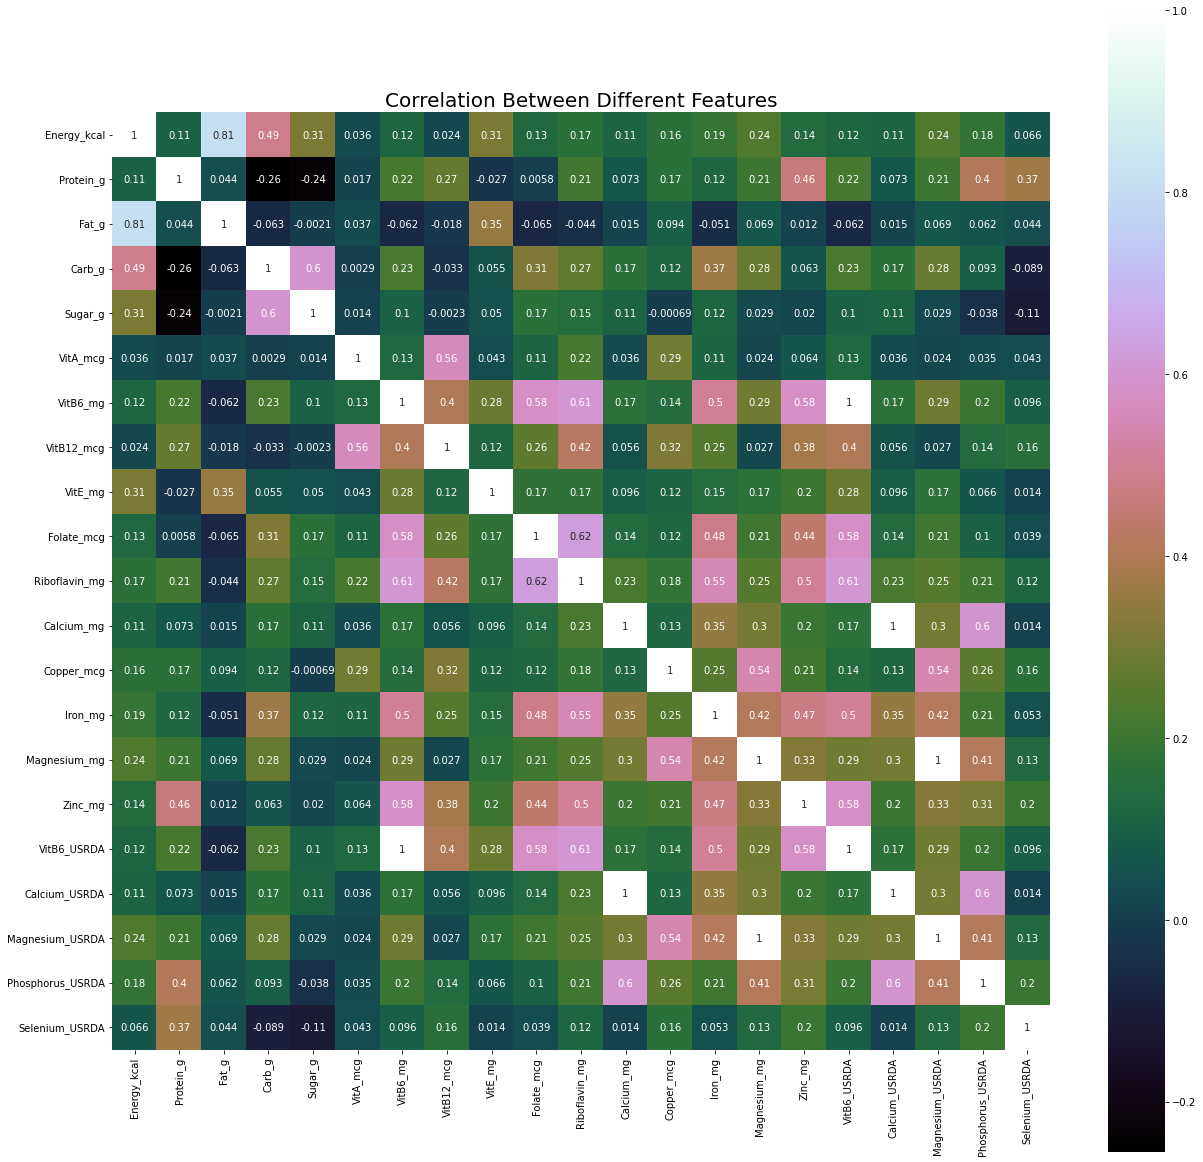

In [4]:
correlation = x.corr()
plt.figure(figsize=(21,21))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation Between Different Features',fontsize=20)

In [5]:
from sklearn.preprocessing import StandardScaler
xstd=StandardScaler().fit_transform(x)
meanv=np.mean(xstd, axis=0)
covmat=(xstd - meanv).T.dot((xstd - meanv)) / (xstd.shape[0]-1)
print('Covariance matrix \n%s' %covmat)

Covariance matrix 
[[ 1.00014817e+00  1.06970382e-01  8.09454477e-01  4.87544915e-01
   3.12941528e-01  3.57191881e-02  1.17896410e-01  2.44093826e-02
   3.13417024e-01  1.29340033e-01  1.65813157e-01  1.13260811e-01
   1.64041779e-01  1.87589832e-01  2.36714990e-01  1.38447297e-01
   1.17896410e-01  1.13260811e-01  2.36714990e-01  1.82877509e-01
   6.55979577e-02]
 [ 1.06970382e-01  1.00014817e+00  4.39997177e-02 -2.55383869e-01
  -2.35509465e-01  1.73555667e-02  2.22555673e-01  2.69414942e-01
  -2.69483054e-02  5.77188291e-03  2.14452337e-01  7.26333716e-02
   1.65891386e-01  1.23382119e-01  2.05528341e-01  4.57588562e-01
   2.22555673e-01  7.26333716e-02  2.05528342e-01  4.03727764e-01
   3.67553808e-01]
 [ 8.09454477e-01  4.39997177e-02  1.00014817e+00 -6.34869489e-02
  -2.11059763e-03  3.70742215e-02 -6.18883954e-02 -1.77363235e-02
   3.54635305e-01 -6.45791352e-02 -4.43458492e-02  1.51377945e-02
   9.35633741e-02 -5.08985012e-02  6.86709827e-02  1.17470506e-02
  -6.18883954e-02  

In [6]:
eigval, eigvec=np.linalg.eig(covmat)
print('\nEigenvalues \n%s' %eigval)


Eigenvalues 
[ 5.70893427e+00  2.47190650e+00  2.22287866e+00  1.93587760e+00
  1.54723192e+00  1.40589387e+00  1.08957183e+00  2.57820796e-03
  7.42217451e-01  6.98223526e-01  5.63157627e-01  5.08764175e-01
  2.66669747e-01  2.85686762e-01  3.12424688e-01  3.71153218e-01
  4.17792376e-01  4.52149149e-01  3.06026705e-16 -6.25981330e-16
 -7.70688037e-16]


In [7]:
print('Eigenvectors \n%s' %eigvec)

Eigenvectors 
[[ 1.49939880e-01  2.48455798e-01  3.04471941e-01  4.29086455e-01
  -1.98219788e-01 -4.59302468e-02 -1.89926578e-01 -6.82047516e-01
   1.97997119e-01 -7.06289249e-02 -1.10454128e-01 -5.71628369e-02
  -1.58014700e-01  2.60993798e-02  2.07080785e-02  3.61613485e-02
  -9.62026641e-02 -2.74914868e-03  2.59361863e-10 -2.89636373e-10
  -1.54589739e-10]
 [ 1.44101574e-01 -4.87272731e-02 -4.09453956e-01  1.84082911e-01
  -8.40159893e-02 -1.95355721e-01 -3.42933966e-01  1.63382939e-01
   2.73470057e-01  2.15607987e-01  1.60206548e-01 -5.65615799e-03
  -3.33715151e-01 -2.84249457e-01 -3.33350211e-01 -2.79479312e-01
  -7.92914355e-02  2.26160459e-01 -4.97651600e-11  2.99377237e-11
   1.71295129e-11]
 [ 3.48905420e-02  2.26712357e-01  1.33020753e-01  5.35048938e-01
  -3.15250670e-01 -6.63262877e-02  1.07569898e-01  5.75698494e-01
   1.75486914e-01 -1.76418849e-01 -1.35749621e-01 -2.39492098e-02
   1.84682595e-01 -3.27229797e-02  6.22559512e-02 -3.63742753e-02
   1.88649762e-01 -1.993

In [ ]:
eigpair=[(np.abs(eigval[i]), eigvec[:,i]) for i in range(len(eigval))] #tuple for (eval,evec) 
eigpair.sort(key=lambda x: x[0], reverse=True) #sort
print('Eigenvalues in descending order:')
for i in eigpair:
    print(i[0])

Eigenvalues in descending order:
5.708934269992463
2.4719064967015414
2.2228786573862704
1.9358776026725588
1.547231920832767
1.4058938661533398
1.0895718308068023
0.7422174509786703
0.6982235263330264
0.5631576270867953
0.5087641753246921
0.4521491485394085
0.41779237637778643
0.3711532178554267
0.3124246881186769
0.2856867615050426
0.26666974745799243
0.0025782079614964956
7.706880369845316e-16
6.259813304592749e-16
3.0602670454467453e-16


In [ ]:
s=0
i=0
total=sum(eigval)
var_exp=[(i/total)*100 for i in sorted(eigval, reverse=True)]
print(var_exp)
while(s<90):
    s=s+var_exp[i]
    i=i+1
print('Sum computed= ',s)
print('Index position= ',i)

[27.181373818821246, 11.769239468245992, 10.583568295379141, 9.217099076146098, 7.36667952994733, 6.693740883717027, 5.187668632179969, 3.533845203989449, 3.324381361002888, 2.681305696796317, 2.4223276326393974, 2.152772207049359, 1.9891927676710262, 1.7671344390167716, 1.4875162046652202, 1.3602116073351191, 1.269667813470187, 0.012275361927435516, 1.4570541297862486e-15, -2.980421868973294e-15, -3.6693993379954864e-15]
Sum computed=  92.1140018059142
Index position=  12


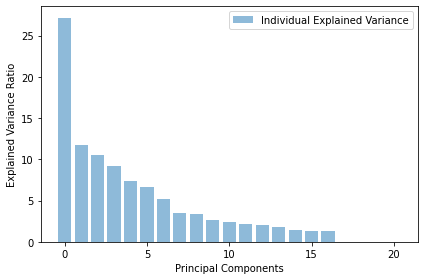

In [ ]:
plt.figure()
plt.bar(range(21), var_exp, alpha=0.5, align='center',label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
w=np.array([np.hstack((eigpair[i][1].reshape(21,1))) for i in range(12)])
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14993988  0.14410157  0.03489054  0.16366799  0.07592897  0.09516514
   0.3169302   0.18688965  0.13627538  0.25725533  0.29883225  0.21140062
   0.19233796  0.29802956  0.27191023  0.28947474  0.3169302   0.21140062
   0.27191023  0.22249744  0.08769444]
 [ 0.2484558  -0.04872727  0.22671236  0.12891528  0.07193415 -0.15618574
  -0.28792569 -0.2933277   0.02357384 -0.22918409 -0.22212874  0.32800711
   0.12316064 -0.03912314  0.27247371 -0.16676205 -0.28792569  0.32800711
   0.27247371  0.27444216 -0.02355873]
 [ 0.30447194 -0.40945396  0.13302075  0.46331144  0.45368199 -0.05523599
   0.06662511 -0.13498714  0.13948466  0.186393    0.07581654 -0.08950876
  -0.13912016  0.08730379 -0.0888786  -0.12195903  0.06662511 -0.08950876
  -0.0888786  -0.2573862  -0.26729689]
 [ 0.42908645  0.18408291  0.53504894 -0.10449995 -0.09614067  0.12979742
  -0.03421148  0.12894435  0.27077598 -0.09317219 -0.05352792 -0.34664577
   0.20334628 -0.1238192   0.06869548  0.051778   -0.03421

In [ ]:
pca_axis=x.dot(w.T)
pca_axis

,0,1,2,3,4,5,6,7,8,9,10,11
0,182.362245,97.397550,189.532895,432.160915,-235.187445,424.453444,-74.240785,166.845409,-87.498763,-224.109979,-158.997579,225.903088
1,182.387674,97.412055,189.553537,432.139744,-235.163883,424.447765,-74.229542,166.859672,-87.566394,-224.077778,-159.064736,225.902692
2,216.033098,110.365221,233.466341,537.559489,-280.288502,519.714957,-92.532231,205.458737,-104.618055,-274.666494,-195.360810,280.234159
3,204.997513,233.135961,49.675660,11.539313,-266.340874,153.434532,-10.650087,49.997493,-71.994002,-76.640771,-69.387273,3.976070
4,244.045386,275.047909,33.377540,-16.850404,-327.710268,229.352698,3.613797,46.436142,-77.194405,-94.001297,-105.471589,19.337243
...,...,...,...,...,...,...,...,...,...,...,...,...
6745,91.705244,103.992137,75.863716,135.926033,-72.238726,19.218617,-44.531310,65.533265,-29.300695,-46.032231,-25.765429,16.019069
6746,39.317018,35.151299,26.748029,49.069666,-10.649498,-8.772146,-23.738351,27.457918,-10.353275,-13.557501,1.745340,10.186204
6747,64.491922,88.347367,147.230132,96.488338,-40.784766,5.140333,-99.031251,40.054891,12.803429,-16.180560,-18.492927,5.211027
6748,93.260245,87.380059,-1.236427,60.363883,83.459671,3.277070,14.288174,22.583232,0.473902,-30.474237,-21.971171,55.636779


In [ ]:
y=xstd.dot(eigvec)
y

array([[-1.15786955e+00,  1.34322650e+00,  1.45773378e+00, ...,
        -2.40637630e-10,  1.18963786e-09,  2.75817006e-10],
       [-1.14976235e+00,  1.35335191e+00,  1.45782472e+00, ...,
        -2.40834729e-10,  1.19033322e-09,  2.76533491e-10],
       [-1.08497497e+00,  1.71459675e+00,  1.95475525e+00, ...,
         1.18335705e-09, -2.54110472e-10,  8.78383028e-10],
       ...,
       [-8.37711778e-01,  5.04128396e-01,  3.66482001e+00, ...,
         1.16529186e-09,  8.59746492e-10,  4.49037161e-10],
       [ 1.79270327e+00,  1.98935050e+00, -2.10989197e+00, ...,
         1.45181124e-09, -1.49580612e-09,  7.25287534e-11],
       [-5.71533839e-01, -1.76266621e-01, -1.60226031e+00, ...,
         1.18631081e-09,  1.30303696e-09,  1.38729794e-09]])

Text(0, 0.5, 'Cumulative Explained Variance')

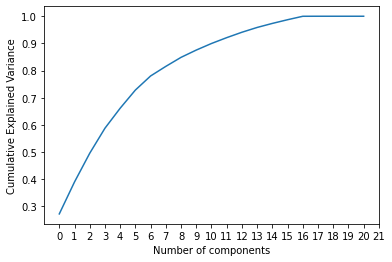

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(xstd)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,22))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')